# Sentiment Analysis and Classification of Yelp reviews with advanced ML

## 1: Reading in the Yelp Reviews

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import nltk
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [3]:
# read yelp.csv into a DataFrame
yelp = pd.read_csv('yelp.csv')

In [4]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [5]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [6]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [7]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [8]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
len(vect.get_feature_names())

16825

In [10]:
X_train_dtm = vect.transform(X_train)

In [11]:
X_test_dtm = vect.transform(X_test)

In [12]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(3064, 16825)

In [13]:
# last 50 features
print(vect.get_feature_names()[-50:])

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [14]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [15]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)

In [16]:
X_train_dtm = vect.fit_transform(X_train)

In [17]:
X_train_dtm.shape

(3064, 20838)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [18]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [19]:
X_train_dtm = vect.fit_transform(X_train)

In [20]:
X_train_dtm.shape

(3064, 169847)

In [21]:
# last 50 features
print(vect.get_feature_names()[-50:])

['zone out', 'zone when', 'zones', 'zones dolls', 'zoning', 'zoning issues', 'zoo', 'zoo and', 'zoo is', 'zoo not', 'zoo the', 'zoo ve', 'zoyo', 'zoyo for', 'zucca', 'zucca appetizer', 'zucchini', 'zucchini and', 'zucchini bread', 'zucchini broccoli', 'zucchini carrots', 'zucchini fries', 'zucchini pieces', 'zucchini strips', 'zucchini veal', 'zucchini very', 'zucchini with', 'zuchinni', 'zuchinni again', 'zuchinni the', 'zumba', 'zumba class', 'zumba or', 'zumba yogalates', 'zupa', 'zupa flavors', 'zuzu', 'zuzu in', 'zuzu is', 'zuzu the', 'zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


**Predicting the star rating:**

In [22]:
vect = CountVectorizer(ngram_range=(1, 2))

In [23]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
# create document-term matrices
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [25]:
# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.8542074363992173


In [27]:
y_pred_class

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [28]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.8199608610567515

In [29]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [30]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  169847
Accuracy:  0.8542074363992173


In [31]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 1))
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


## 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [32]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. 

In [33]:
vect = CountVectorizer(stop_words='english')

In [34]:
# set of stop words
print(vect.get_stop_words())

frozenset({'ten', 'hereupon', 'several', 'whom', 'done', 'top', 'fifteen', 'often', 'go', 'most', 'these', 'each', 'in', 'always', 'over', 'elsewhere', 'hence', 'nor', 'on', 'whole', 'against', 'five', 'nowhere', 'last', 're', 'get', 'then', 'neither', 'also', 'towards', 'at', 'both', 'amoungst', 'six', 'had', 'though', 'however', 'anything', 'everything', 'de', 'call', 'have', 'per', 'than', 'or', 'any', 'an', 'thereafter', 'no', 'may', 'other', 'made', 'without', 'all', 'via', 'now', 'somehow', 'etc', 'whereas', 'show', 'twelve', 'could', 'because', 'thereupon', 'cannot', 'am', 'hers', 'she', 'thereby', 'what', 'see', 'throughout', 'too', 'becomes', 'part', 'third', 'another', 'you', 'nine', 'although', 'as', 'below', 'how', 'side', 'never', 'their', 'back', 'amongst', 'yourself', 'if', 'those', 'thus', 'put', 'enough', 'detail', 'either', 'which', 'meanwhile', 'under', 'take', 'three', 'found', 'i', 'whereby', 'can', 'with', 'toward', 'yours', 'besides', 'along', 'whence', 'wherein'

In [35]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  16528
Accuracy:  0.9158512720156555


In [36]:
# without stopwords, dtm size
vect = CountVectorizer()
vect.fit(X_train)
vect.transform(X_train)

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [37]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)
vect.transform(X_train)

<3064x16528 sparse matrix of type '<class 'numpy.int64'>'
	with 143743 stored elements in Compressed Sparse Row format>

In [38]:
my_additional_stop_words = ['abcd']

In [39]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [40]:
myKeyWords = ['a', 'about', 'above']
text.ENGLISH_STOP_WORDS.difference(myKeyWords)

frozenset({'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           

In [41]:
# with stopwords, dtm size
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(X_train)
vect.transform(X_train)

<3064x16528 sparse matrix of type '<class 'numpy.int64'>'
	with 143743 stored elements in Compressed Sparse Row format>

In [42]:
# remove updated stop words 
vect = CountVectorizer(stop_words=my_stop_words)
tokenize_test(vect)

Features:  16528
Accuracy:  0.9158512720156555


## 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [43]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.8698630136986302


In [44]:
# all 100 features
print(vect.get_feature_names())

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'table', 'thing', 'things', 'think', 'time', 'times', 'took', 'town', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


In [45]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.8855185909980431


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [46]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  43957
Accuracy:  0.9324853228962818


##  5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [47]:
# print the first review
print (yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [48]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.text[0])

In [49]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# list the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [51]:
# list the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [52]:
# some string methods are available
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

##  6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [53]:
# initialize stemmer
stemmer = SnowballStemmer('english')

In [54]:
# stem each word
print ([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

In [57]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

In [58]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize(pos='v') for word in words]

In [59]:
split_into_lemmas(yelp_best_worst.text[0])

['my',
 'wife',
 'take',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'be',
 'excellent',
 'the',
 'weather',
 'be',
 'perfect',
 'which',
 'make',
 'sit',
 'outside',
 'overlook',
 'their',
 'ground',
 'an',
 'absolute',
 'pleasure',
 'our',
 'waitress',
 'be',
 'excellent',
 'and',
 'our',
 'food',
 'arrive',
 'quickly',
 'on',
 'the',
 'semi-busy',
 'saturday',
 'morning',
 'it',
 'look',
 'like',
 'the',
 'place',
 'fill',
 'up',
 'pretty',
 'quickly',
 'so',
 'the',
 'earlier',
 'you',
 'get',
 'here',
 'the',
 'better',
 'do',
 'yourself',
 'a',
 'favor',
 'and',
 'get',
 'their',
 'bloody',
 'mary',
 'it',
 'be',
 'phenomenal',
 'and',
 'simply',
 'the',
 'best',
 'i',
 "'ve",
 'ever',
 'have',
 'i',
 "'m",
 'pretty',
 'sure',
 'they',
 'only',
 'use',
 'ingredients',
 'from',
 'their',
 'garden',
 'and',
 'blend',
 'them',
 'fresh',
 'when',
 'you',
 'order',
 'it',
 'it',
 'be',
 'amaze',
 'while',
 'everything',
 'on',
 'the',
 'menu',
 'lo

In [60]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)

In [61]:
tokenize_test(vect)

Features:  15344
Accuracy:  0.9178082191780822


In [62]:
vect = CountVectorizer()

In [63]:
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


In [64]:
# last 50 features
print (vect.get_feature_names()[-50:])

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


## 7: Sentiment Analysis

In [70]:
print (review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [71]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.40246913580246907

In [72]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [73]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [74]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

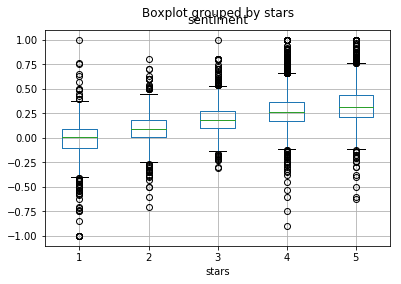

In [75]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [76]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [77]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [78]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [79]:
# negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [80]:
# positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [81]:
# reset the column display width
pd.reset_option('max_colwidth')

## 8: Adding Features to a Document-Term Matrix

In [82]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [83]:
# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

In [84]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [85]:
# use CountVectorizer with text column only
vect = CountVectorizer()

In [86]:
X_train_dtm = vect.fit_transform(X_train.text)

In [87]:
X_test_dtm = vect.transform(X_test.text)

In [88]:
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(3064, 16825)
(1022, 16825)


In [89]:
# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [90]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [91]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [92]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [93]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9168297455968689


In [94]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9227005870841487


## 9: Fun TextBlob Features

In [95]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [96]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [97]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [112]:
# language identification
TextBlob('vous').detect_language()

'fr'